# Test stuff for PFN model

Classify pions, photons, and **scalars**

In [1]:
# Add import paths
import sys
sys.path.append("..")

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import datetime as dt
from utils import print_gpu_memory

# Make tensorflow not use too much memory
print(f"Importing tensorflow...")
import tensorflow as tf
print(f"Enabling memory growth...")
gpus = tf.config.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

disk_dir = "/usatlas/atlas01/atlasdisk/users/atlas_wifeng"

Importing tensorflow...
Enabling memory growth...


In [2]:
# Get data
from data import get_data
(X_train, X_val, X_test,
 Y_train, Y_val, Y_test) = get_data("scalar_test/all_jets_7_feature_point_cloud.npz")

print(X_train.shape, Y_train.shape)

(240000, 960, 7) (240000, 3)


In [3]:
# Build model
from model import PFN
Phi_sizes = [128, 128, 128, 128, 64, 64, 64]
F_sizes = [128, 128, 128, 128, 64, 64, 64]

_, n_particles, n_features = X_train.shape
model = PFN(
    n_features=n_features,
    n_particles=n_particles,
    n_outputs=Y_train.shape[1],
    Phi_sizes=Phi_sizes,
    F_sizes=F_sizes
)

In [4]:
from collections import defaultdict
history = defaultdict(list)

In [12]:
# Utility functions for training
from train_model import train_model

def train_iteration(lr, epochs):
    fit_history = train_model(
        model=model, 
        data=(X_train, X_val, Y_train, Y_val),
        lr=lr,
        epochs=epochs
    )
    print(f"\nSaving history...")
    for key in ["loss", "val_loss", "accuracy", "val_accuracy"]:
        history[key].extend(fit_history.history[key])
    return fit_history

def save_model(name):
    model_dir = f"{disk_dir}/photon-jet/models/pfn"
    cur_date = dt.datetime.now().strftime("%Y-%m-%d")
    model.save(f"{model_dir}/{name}_{cur_date}")

In [6]:
print_gpu_memory()

GPU memory usage
  current: 558.25 KB
  peak:    619.75 KB


In [7]:
print(f"=== Training [{dt.datetime.now()}] ===")
train_iteration(lr=2e-4, epochs=30)

=== Training [2023-06-07 18:05:12.443742] ===
Epoch 1/30
2400/2400 [==============================] - 54s 20ms/step - loss: 1.6891 - accuracy: 0.3563 - val_loss: 1.0466 - val_accuracy: 0.4219
Epoch 2/30
2400/2400 [==============================] - 46s 19ms/step - loss: 1.1515 - accuracy: 0.4318 - val_loss: 0.9999 - val_accuracy: 0.4746
Epoch 3/30
2400/2400 [==============================] - 46s 19ms/step - loss: 0.9937 - accuracy: 0.4784 - val_loss: 0.9576 - val_accuracy: 0.5103
Epoch 4/30
2400/2400 [==============================] - 46s 19ms/step - loss: 0.9597 - accuracy: 0.5031 - val_loss: 0.9798 - val_accuracy: 0.4956
Epoch 5/30
2400/2400 [==============================] - 46s 19ms/step - loss: 0.9484 - accuracy: 0.5109 - val_loss: 1.0478 - val_accuracy: 0.4372
Epoch 6/30
2400/2400 [==============================] - 47s 19ms/step - loss: 0.9339 - accuracy: 0.5213 - val_loss: 0.8945 - val_accuracy: 0.5430
Epoch 7/30
2400/2400 [==============================] - 46s 19ms/step - loss: 

In [8]:
print(f"=== Training [{dt.datetime.now()}] ===")
train_iteration(lr=2e-5, epochs=30)

=== Training [2023-06-07 18:28:45.423167] ===
Epoch 1/30
2400/2400 [==============================] - 52s 20ms/step - loss: 0.2716 - accuracy: 0.8893 - val_loss: 0.2558 - val_accuracy: 0.8971
Epoch 2/30
2400/2400 [==============================] - 47s 19ms/step - loss: 0.2532 - accuracy: 0.8983 - val_loss: 0.2407 - val_accuracy: 0.9043
Epoch 3/30
2400/2400 [==============================] - 47s 19ms/step - loss: 0.2417 - accuracy: 0.9038 - val_loss: 0.2455 - val_accuracy: 0.9032
Epoch 4/30
2400/2400 [==============================] - 47s 19ms/step - loss: 0.2294 - accuracy: 0.9101 - val_loss: 0.2289 - val_accuracy: 0.9104
Epoch 5/30
2400/2400 [==============================] - 47s 19ms/step - loss: 0.2220 - accuracy: 0.9138 - val_loss: 0.2167 - val_accuracy: 0.9143
Epoch 6/30
2400/2400 [==============================] - 47s 19ms/step - loss: 0.2114 - accuracy: 0.9186 - val_loss: 0.1975 - val_accuracy: 0.9267
Epoch 7/30
2400/2400 [==============================] - 47s 19ms/step - loss: 

In [9]:
print(f"=== Training [{dt.datetime.now()}] ===")
train_iteration(lr=2e-6, epochs=30)

=== Training [2023-06-07 18:53:18.242744] ===


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [13]:
save_model("7_feature_95pc")

INFO:tensorflow:Assets written to: /usatlas/atlas01/atlasdisk/users/atlas_wifeng/photon-jet/models/pfn/7_feature_95pc_2023-06-07/assets


INFO:tensorflow:Assets written to: /usatlas/atlas01/atlasdisk/users/atlas_wifeng/photon-jet/models/pfn/7_feature_95pc_2023-06-07/assets


### Evaluate model

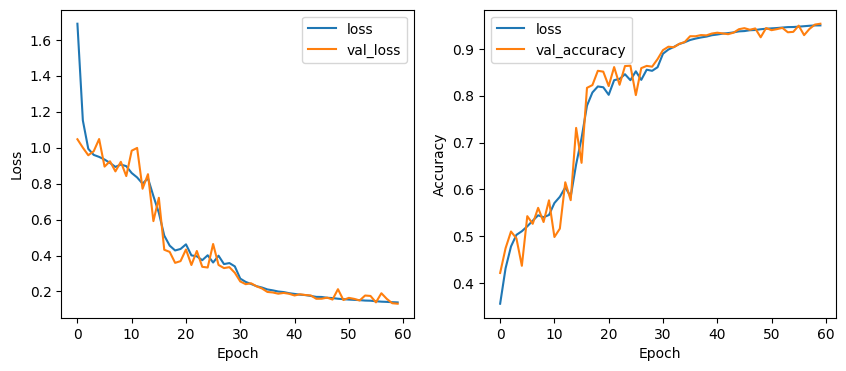

In [14]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axs

ax1.plot(history["loss"])
ax1.plot(history["val_loss"])
ax1.legend(["loss", "val_loss"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss");

ax2.plot(history["accuracy"])
ax2.plot(history["val_accuracy"])
ax2.legend(["loss", "val_accuracy"])
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy");

60/60 [==============================] - 2s 31ms/step
Testing accuracy: 0.953


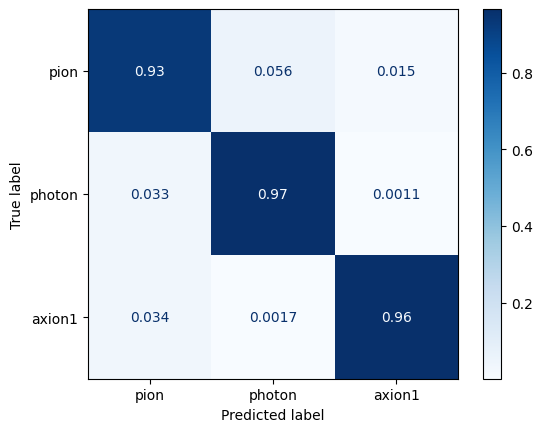

In [15]:
# Test model
from test_model import test_model, plot_cm
test_accuracy, cm = test_model(model, (X_test, Y_test))
print(f"Testing accuracy: {test_accuracy}")

plot_cm(cm, ["pion", "photon", "axion1"])